In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Practice 1

In [43]:
def standard(X):
    return (X-X.mean())/X.std()

def minmax(X):
    return (X-X.min())/(X.max()-X.min())

def maxabs(X):
    return X/np.abs(X).max()

def robust(X):
    return (X-X.median())/(np.percentile(X, 75)-np.percentile(X, 25))

In [44]:
np.random.seed(2019)
df = pd.DataFrame({
    'x1': np.random.chisquare(8, 10000),
    'x2': np.random.normal(5, 3, 10000),
    'x3': np.random.normal(-5, 5, 10000)
})

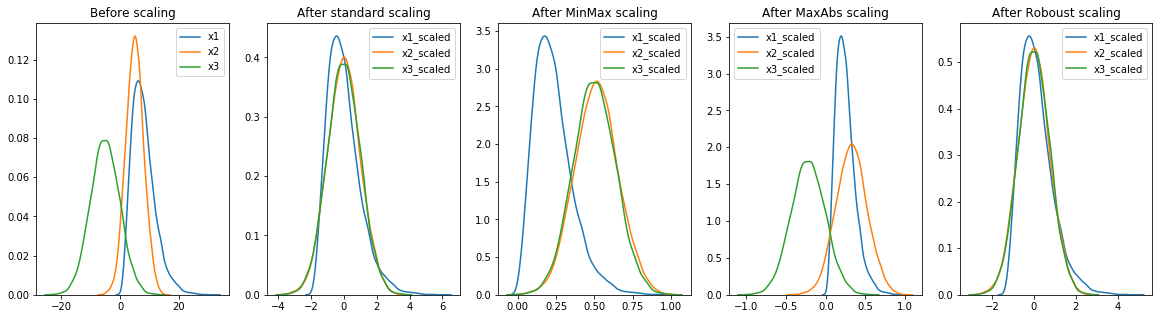

In [46]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))

ax[0].set_title('Before scaling')
sns.kdeplot(df['x1'], ax=ax[0])
sns.kdeplot(df['x2'], ax=ax[0])
sns.kdeplot(df['x3'], ax=ax[0])

ax[1].set_title('After standard scaling')
sns.kdeplot(standard(df['x1']), ax=ax[1], legend=True, label='x1_scaled')
sns.kdeplot(standard(df['x2']), ax=ax[1], legend=True, label='x2_scaled')
sns.kdeplot(standard(df['x3']), ax=ax[1], legend=True, label='x3_scaled')

ax[2].set_title('After MinMax scaling')
sns.kdeplot(minmax(df['x1']), ax=ax[2], legend=True, label='x1_scaled')
sns.kdeplot(minmax(df['x2']), ax=ax[2], legend=True, label='x2_scaled')
sns.kdeplot(minmax(df['x3']), ax=ax[2], legend=True, label='x3_scaled')

ax[3].set_title('After MaxAbs scaling')
sns.kdeplot(maxabs(df['x1']), ax=ax[3], legend=True, label='x1_scaled')
sns.kdeplot(maxabs(df['x2']), ax=ax[3], legend=True, label='x2_scaled')
sns.kdeplot(maxabs(df['x3']), ax=ax[3], legend=True, label='x3_scaled')

ax[4].set_title('After Roboust scaling')
sns.kdeplot(robust(df['x1']), ax=ax[4], legend=True, label='x1_scaled')
sns.kdeplot(robust(df['x2']), ax=ax[4], legend=True, label='x2_scaled')
sns.kdeplot(robust(df['x3']), ax=ax[4], legend=True, label='x3_scaled')

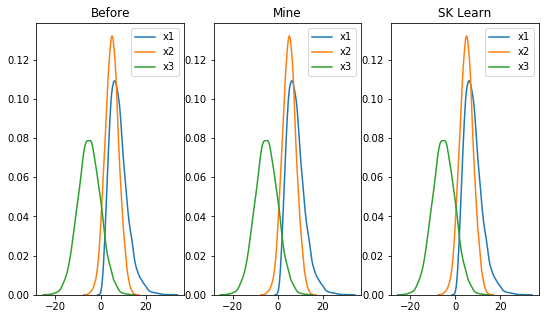

In [15]:
_, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,5))

ax1.set_title('Before')
sns.kdeplot(df['x1'], ax=ax1)
sns.kdeplot(df['x2'], ax=ax1)
sns.kdeplot(df['x3'], ax=ax1)

ax2.set_title('Mine')
sns.kdeplot(df['x1'], ax=ax2)
sns.kdeplot(df['x2'], ax=ax2)
sns.kdeplot(df['x3'], ax=ax2)

# This code is just to check our answer
scaled = preprocessing.StandardScaler().fit_transform(df)
scaled = pd.DataFrame(scaled, columns = ['x1', 'x2', 'x3'])
ax3.set_title('SK Learn')
sns.kdeplot(df['x1'], ax=ax3)
sns.kdeplot(df['x2'], ax=ax3)
sns.kdeplot(df['x3'], ax=ax3)
plt.show()

### 2

In [25]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

data = datasets.load_boston()
dfX = pd.DataFrame(data.data, columns=data.feature_names)
dfX = dfX.drop(['CHAS', 'RAD'], axis=1) #범주형 제거
dfY = pd.DataFrame(data.target, columns=['MEDV'])
regr = LinearRegression()

# ToDo: data processing
n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
avg/n

0.6928385917796467

TypeError: float() argument must be a string or a number, not 'AxesSubplot'

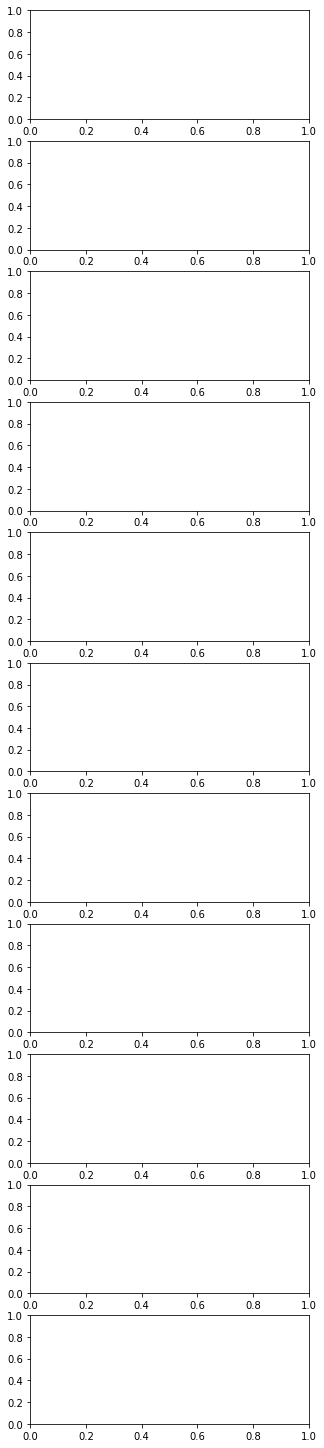

In [26]:
_, axes = plt.subplots(11, 1, figsize = (5, 26))
for i, ax in enumerate(axes):
    sns.kdeplot(dfX.iloc[:, i], axes)

In [29]:
dfX.LSTAT = np.log(dfX.LSTAT)
dfX.DIS =  np.log(dfX.DIS)

In [30]:
n=1000
avg=0
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(dfX, dfY, train_size=0.7)
    regr.fit(X_train, y_train)
    avg += regr.score(X_test, y_test)
avg/n

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### 3

In [32]:
df = pd.read_csv('./Data_Prep.csv', index_col=0)

In [33]:
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3504812.0,0.0,0.0,3504812.0
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,17123098.0,0.0,0.0,17123098.0
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2234363.0,0.0,0.0,2234363.0
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,602361.0,210114.0,0.0,812475.0
4,10100000624840,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
df_ = df.drop(['iduser', 'mdutype', 'group'], axis = 1)

In [37]:
scaler = [preprocessing.StandardScaler() for i in df_.columns]

In [ ]:
def std_based_outlier(df): # 강의자료에 있음, p24
    s = set()
    for colname in df.columns:
        outlier = np.abs(df[colname][df[colname].notnull()]-df[collname][])
        s.update(outlier[outlier==True].index.tolist())
    df = df.iloc[list(set(range(len(df))).difference(s))]
    return df
        
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr*1.5)
    upper_bound = quartile_3 + (iqr*1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [ ]:
_, axes = plot.subplots(19, 1, figsize=(5,50))
for i, ax in enumerate(axes):
    

In [ ]:
df = std_base_outlier(df_)
df